In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import time

In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

# MNISTの場合，60000が学習，10000がテスト，と決まっている
# http://yann.lecun.com/exdb/mnist/

X_train, X_test = mnist.data[:60000]/255., mnist.data[60000:]/255.
y_train, y_test = mnist.target[:60000], mnist.target[60000:]


In [4]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [9]:
from sklearn.linear_model import SGDClassifier

In [8]:
clf = SGDClassifier(loss="log") # Logistic regression をすることを意味する．
clf

/Users/yohei/anaconda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

```python
SGDClassifier(loss="log", "hinge" # default
                   , "...")
```
SGDClassfier はloss引数でどのモデルを扱うかを指定する．

loss="log" はロジスティック回帰，　loss="hinge" はlinearのSVMを表す．

またSGDClassifier はデータ数が多い時でも容易に識別できる

In [9]:
for thin in [100, 50, 10, 5, 4, 3, 2, 1]:
    st = time.time()
    clf.fit(X_train[::thin], y_train[::thin])
    et = time.time() - st
    score = clf.score(X_test[::thin], y_test[::thin])
    print("{0:.2f} sec, size {1}, accuracy {2}".format(et, 
                                                       y_train[::thin].size,
                                                       score))

0.15 sec, size 600, accuracy 0.89
0.17 sec, size 1200, accuracy 0.84
0.74 sec, size 6000, accuracy 0.863
1.44 sec, size 12000, accuracy 0.88
1.80 sec, size 15000, accuracy 0.87
2.41 sec, size 20000, accuracy 0.8893221355728854
3.79 sec, size 30000, accuracy 0.8712
7.20 sec, size 60000, accuracy 0.8994


In [10]:
clf = SGDClassifier(loss="hinge") # linear SVM

/Users/yohei/anaconda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [11]:
for thin in [100, 50, 10, 5, 4, 3, 2, 1]:
    st = time.time()
    clf.fit(X_train[::thin], y_train[::thin])
    et = time.time() - st
    score = clf.score(X_test[::thin], y_test[::thin])
    print("{0:.2f} sec, size {1}, accuracy {2}".format(et, 
                                                       y_train[::thin].size,
                                                       score))

0.05 sec, size 600, accuracy 0.82
0.10 sec, size 1200, accuracy 0.845
0.42 sec, size 6000, accuracy 0.844
0.83 sec, size 12000, accuracy 0.8775
0.99 sec, size 15000, accuracy 0.8584
1.33 sec, size 20000, accuracy 0.8497300539892022
2.03 sec, size 30000, accuracy 0.8908
3.91 sec, size 60000, accuracy 0.8837


/Users/yohei/anaconda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


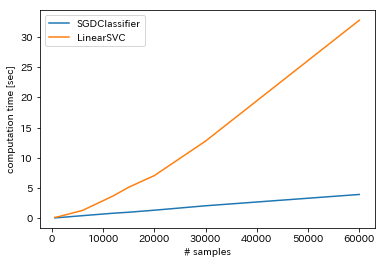

In [12]:
# LinearSVC(primal)と比較してみる．
from sklearn.svm import LinearSVC

for clf in [SGDClassifier(loss="hinge"),
            LinearSVC(dual=False)]:
    times = []
    sizes = []
    for thin in [100, 50, 10, 5, 4, 3, 2, 1]:
        st = time.time()
        clf.fit(X_train[::thin], y_train[::thin])
        times.append(time.time() - st)
        sizes.append(y_train[::thin].size)
    plt.plot(sizes, times, label=clf.__class__.__name__)

plt.legend(loc="best")
plt.ylabel("computation time [sec]")
plt.xlabel("# samples")
plt.show()

scikit-learn document: [Logistic regression](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

\\[
\min_{w,b}
\frac{1}{2} \| w \|_2^2
+ C \sum_{i=1}^N
\log(\exp(-y_i(w^T x_i + b)) + 1)
\\]
                                             
scikit-learn document: [SVC](http://scikit-learn.org/stable/modules/svm.html#svc)

$$
\min_{w, b, \{\xi_i\} }
\frac{1}{2} \| w \|_2^2
+ C \sum_{i=1}^N \xi_i
\quad \text{subject to}\quad 
y_i(w^T x_i + b) \ge 1 - \xi_i
$$

In [13]:
C_range_exp = np.arange(-5.0, 15.0)
C_range = 10 ** C_range_exp

scores = []
comp_time = []

clf = SGDClassifier(loss="hinge") # SVM

for C in C_range:
    clf.alpha = X_train.shape[0] / C # n_sample/alpha = C http://scikit-learn.org/stable/modules/svm.html#svc

    st = time.time()
    clf.fit(X_train, y_train)
    et = time.time() - st

    comp_time.append(et)
    score = clf.score(X_test, y_test)
    scores.append(score)
    
    print(C, et, score)

/Users/yohei/anaconda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


1e-05 7.002293825149536 0.1885
0.0001 6.98628306388855 0.5224
0.001 6.9652628898620605 0.1773
0.01 6.972851991653442 0.6175
0.1 6.966391086578369 0.6903
1.0 7.047661066055298 0.0982
10.0 6.9644880294799805 0.619
100.0 7.013153791427612 0.4629
1000.0 6.71097207069397 0.6792
10000.0 4.8694751262664795 0.6412
100000.0 4.475745916366577 0.8158
1000000.0 4.198405981063843 0.8867
10000000.0 4.051783084869385 0.9082
100000000.0 3.939927101135254 0.9082
1000000000.0 3.9038119316101074 0.896
10000000000.0 3.897510051727295 0.8622
100000000000.0 3.9536077976226807 0.8613
1e+12 4.157839059829712 0.8476
1e+13 4.031378984451294 0.8824
1e+14 3.901848077774048 0.8908


SGDClassifierでのLinearSVMのC:正則化項は $\alpha$ で指定する．

$\alpha$と$C$の関係は以下の通り
$$
\frac{\text{n_sample}}{\alpha} = C
$$

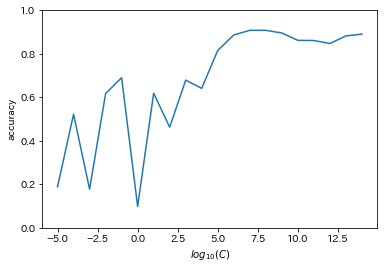

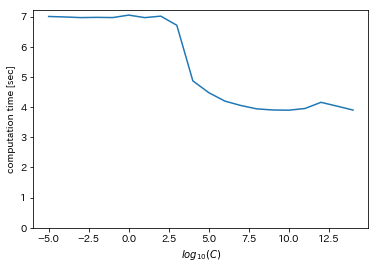

In [16]:
scores = np.array(scores)
comp_time = np.array(comp_time)

plt.plot(C_range_exp, scores)
plt.ylabel("accuracy")
plt.xlabel(r"$log_{10}(C)$");
plt.ylim(0,1)

plt.show()

plt.plot(C_range_exp, comp_time)
plt.ylim(0,)
plt.ylabel("computation time [sec]")
plt.xlabel(r"$log_{10}(C)$");

Cが大きい方が学習時間が減っている．

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


estimators = [('scaler', MinMaxScaler()), 
              ('clf', SGDClassifier(loss="hinge"))]

pipe = Pipeline(estimators)

param = {'clf__alpha': (X_train.shape[0] * 2./3.) / (10**np.arange(-5.0, 10.0)) } # 内部でcv=3とされるので学習データ数 * (2/3)とした．

gs = GridSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


/Users/yohei/anaconda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


[CV] clf__alpha=4000000000.0 .........................................
[CV] clf__alpha=4000000000.0 .........................................
[CV] clf__alpha=4000000000.0 .........................................
[CV] clf__alpha=400000000.0 ..........................................
[CV] .......................... clf__alpha=4000000000.0, total=  10.7s
[CV] clf__alpha=400000000.0 ..........................................
[CV] .......................... clf__alpha=4000000000.0, total=  10.9s
[CV] clf__alpha=400000000.0 ..........................................
[CV] .......................... clf__alpha=4000000000.0, total=  11.1s
[CV] clf__alpha=40000000.0 ...........................................
[CV] ........................... clf__alpha=400000000.0, total=  11.0s
[CV] clf__alpha=40000000.0 ...........................................
[CV] ........................... clf__alpha=400000000.0, total=  11.5s
[CV] clf__alpha=40000000.0 ...........................................
[CV] .

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min


[CV] .................................. clf__alpha=0.04, total=   8.4s
[CV] clf__alpha=0.004 ................................................
[CV] .................................. clf__alpha=0.04, total=   7.8s
[CV] clf__alpha=0.004 ................................................
[CV] .................................. clf__alpha=0.04, total=   7.7s
[CV] clf__alpha=0.0004 ...............................................
[CV] ................................. clf__alpha=0.004, total=   7.4s
[CV] clf__alpha=0.0004 ...............................................
[CV] ................................. clf__alpha=0.004, total=   7.2s
[CV] clf__alpha=0.0004 ...............................................
[CV] ................................. clf__alpha=0.004, total=   7.3s
[CV] clf__alpha=4e-05 ................................................
[CV] ................................ clf__alpha=0.0004, total=   6.9s
[CV] clf__alpha=4e-05 ................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__alpha': array([  4.00000e+09,   4.00000e+08,   4.00000e+07,   4.00000e+06,
         4.00000e+05,   4.00000e+04,   4.00000e+03,   4.00000e+02,
         4.00000e+01,   4.00000e+00,   4.00000e-01,   4.00000e-02,
         4.00000e-03,   4.00000e-04,   4.00000e-05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

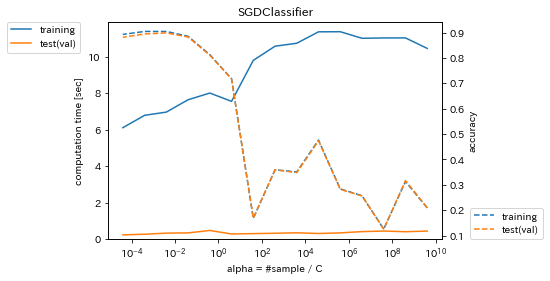

In [25]:
plt.plot(gs.cv_results_['param_clf__alpha'].data, 
         gs.cv_results_['mean_fit_time'], 
         label="training")

plt.plot(gs.cv_results_['param_clf__alpha'].data,
         gs.cv_results_['mean_score_time'], 
         label="test(val)")
plt.ylabel("computation time [sec]")
plt.ylim(0,)
plt.xscale("log")
plt.xlabel("alpha = #sample / C")
plt.legend(bbox_to_anchor=(-0.3, 1), loc="upper left", borderaxespad=0.);

plt.twinx()

plt.plot(gs.cv_results_['param_clf__alpha'].data, 
         gs.cv_results_['mean_train_score'], 
         linestyle="--",
         label="training")

plt.plot(gs.cv_results_['param_clf__alpha'].data,
         gs.cv_results_['mean_test_score'], 
         linestyle="--",
         label="test(val)")
plt.ylabel("accuracy")
plt.legend(bbox_to_anchor=(1.3, 0), loc="lower right", borderaxespad=0.);

plt.title("SGDClassifier")

In [5]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [6]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [15]:
clf = SGDClassifier(loss="hinge") # SVM

/Users/yohei/anaconda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [18]:
clf.fit(X_train, y_train) # SGDなので結果は毎回変わる． random_stateで固定してやれば毎回同じ結果が得られる．
clf.score(X_test, y_test)

0.96491228070175439

In [19]:
clf = SGDClassifier(loss="log") # logistic regression

/Users/yohei/anaconda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [20]:
clf.fit(X_train, y_train) # SGDなので結果は毎回変わる．
clf.score(X_test, y_test)

0.93859649122807021

In [21]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.96491228070175439

In [22]:
from sklearn.linear_model import  LogisticRegression
clf = LogisticRegression()

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.95614035087719296